<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پسته
</font>
</h1>

<center>
<img src="pistachios.jpg">
</center>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه و صورت مسئله
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    آیا می‌دانستید که پسته‌ها هم انواع مختلفی دارند؟ تنها در ایران گیاه‌شناسان بیش از چند ده نوع پسته شناسایی کرده‌اند، هرچند که تعداد محدودتری به شکل تجاری شناخته‌شده و در دسترس هستند. با توجه به اینکه هرکدام از گونه‌های مختلف از ویژگی‌های خاص و متفاوتی برخوردارند، شناسایی گونه‌های مختلف و تفکیک پسته‌ها، عملی بسیار کاربردی است. به عنوان مثال برخی پسته‌ها برای مصارف شیرینی‌پزی مناسب‌ترند و برخی دیگر که تُردتر هستند بیشتر به عنوان تنقلات مصرف می‌شوند.
    <br>
    حال فرض کنید که یک شرکت یا فروشگاه که بصورت عمده پسته خریداری می‌کند می‌خواهد نوع پسته‌ی خریداری‌شده خود را تشخیص دهد تا مطمئن شود که همان پسته‌ی موردنظر خودش است و کسی این بین سودجویی نکرده باشد. به عنوان مثال در ایران قیمت پسته‌ی <i>اکبری</i> گران‌تر از سایر پسته‌ها مثل پسته‌ای با نام <i>احمد آقایی</i> است. اگر فروشگاه قصد خرید پسته‌ی اکبری را داشته و تشخیص دهد که به وی پسته‌ی احمد آقایی فروخته‌اند، با توجه به حجم زیاد خرید ممکن است زیان بسیار بالایی ببیند.
    <br>
    اما چگونه می‌توان پسته‌ها را از روی ظاهرشان قضاوت کرده و تفکیک‌شان کرد؟ اگر این کار را به عهده‌ی یک فرد متخصص (پسته‌شناس!) هم بگذاریم در بهترین حالت وقتی یک پسته را ببیند چنین عمل می‌کند که مثلاً از نظر شکل شبیه به کدام یک از پسته‌هایی‌ست که می‌شناسد، از نظر طول یا اندازه چطور، میزان خندان بودن آن به کدام پسته شباهت دارد و سوالاتی از این دست، تا اینکه تصمیم نهایی خود را اعلام کند.
    <br>
    اگر کمی دقت کنید این کار بسیار شبیه به همان روالی است که در الگوریتم <b>«k-نزدیک‌ترین همسایه»</b> در پیش گرفته می‌شود. یعنی با مشاهده‌ی یک نمونه‌ی جدید، فاصله‌ی ویژگی‌های آن را با ویژگی‌های تمام نمونه‌های از پیش دیده‌شده می‌سنجد و از میان <code>k</code> تا از نزدیک‌ترین نمونه‌ها بررسی می‌کند که متداول‌ترین دسته کدام است و آن را به عنوان خروجی اعلام می‌کند.  
    در این تمرین قصد داریم مدل <i>k-NN</i> را بر روی یک مجموعه‌داده‌‌ی پسته‌ای بسازیم و بررسی کنیم که با چه دقتی می‌توان دو نوع متفاوت از پسته را بصورت هوشمند از همدیگر تفکیک کرد.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
وارد کردن کتابخانه‌های مورد نیاز
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    ابتدا کتابخانه‌های مورد نیازتان را وارد کنید.
</font>
</p>

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from preprocessing_koosha import PreprocessingKoosha
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معرفی مجموعه‌داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
مجموعه‌داده‌ای که در اختیار شما قرار گرفته شامل ۱۷۱۸ داده‌ی مربوط به دو نوع پسته‌ی <i>Kirmizi</i> و <i>Siirt</i> است که در کشور ترکیه تولید می‌شود.
از این دو نوع پسته تصاویری با رزولوشن بسیار بالا گرفته شده و سپس تکنیک‌های پردازش تصویر بر روی آن‌ها اعمال شده است. 
به کمک این تکنیک‌ها و استخراج ویژگی در نهایت ۱۶ ویژگی برای هر نمونه ثبت شده است. برخی از این ویژگی‌ها مانند طول یا محیط بصورت مستقیم از روی تصویر بدست آمده و برخی دیگر از ویژگی‌ها طبق این ویژگی‌های اصلی تولید شده‌اند. از آنجا که ویژگی‌های به‌دست‌آمده طبق فرمول‌هایی براساس سایر ویژگی‌ها بوده‌اند به منظور پرهیز از پیچیدگی از شرح آن‌ها خودداری می‌کنیم اما برخی از آن‌ها در تصویر زیر نمایش داده شده است.
</font>
</p>

<center>
<img src="image.jpg">
</center>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خواندن مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در ابتدا نیاز است فایل‌های مجموعه‌داده را بخوانید. نمونه‌های آموزشی در فایل <code>train.csv</code> و نمونه‌های آزمون که باید دسته‌ی آن‌ها را پیش‌بینی کنید در فایل <code>test.csv</code> ذخیره شده‌اند. اگر لازم دانستید می‌توانید به دلخواه خود بخشی از مجموعه‌ی آموزشی را به عنوان مجموعه‌ی اعتبارسنجی نیز جدا کنید.
</font>
</p>

In [26]:
train_data = pd.read_csv("../data/train.csv") # To-Do
train_data

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664,Kirmizi_Pistachio
1,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802,Siit_Pistachio
2,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591,Kirmizi_Pistachio
3,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807,Kirmizi_Pistachio
4,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648,Kirmizi_Pistachio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,65570,2071.4451,418.0258,217.1458,0.8545,288.9400,0.8976,73054,0.5945,1.9251,0.1920,0.6912,0.0064,0.0033,0.4778,0.9197,Kirmizi_Pistachio
1714,68849,1441.2590,451.0457,205.2553,0.8905,296.0764,0.9340,73716,0.6459,2.1975,0.4165,0.6564,0.0066,0.0030,0.4309,0.9469,Kirmizi_Pistachio
1715,90270,1370.5380,428.9636,269.8232,0.7774,339.0211,0.9722,92847,0.7400,1.5898,0.6039,0.7903,0.0048,0.0030,0.6246,0.9930,Siit_Pistachio
1716,73148,1309.8430,469.0491,208.3141,0.8960,305.1801,0.9376,78014,0.6341,2.2516,0.5358,0.6506,0.0064,0.0028,0.4233,0.9532,Kirmizi_Pistachio


In [27]:
test_data = pd.read_csv("../data/test.csv") # To-Do
test_data

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
0,97328,1828.9189,468.0632,273.5379,0.8115,352.0254,0.9413,103392,0.7235,1.7111,0.3656,0.7521,0.0048,0.0028,0.5656,0.9679
1,99449,1200.6021,456.6979,279.8051,0.7903,355.8404,0.9803,101447,0.7192,1.6322,0.8670,0.7792,0.0046,0.0028,0.6071,0.9909
2,92956,1275.0940,484.9293,245.3009,0.8626,344.0280,0.9878,94101,0.6377,1.9769,0.7185,0.7094,0.0052,0.0026,0.5033,0.9950
3,83504,1148.1840,435.5270,244.6119,0.8274,326.0684,0.9878,84535,0.7328,1.7805,0.7960,0.7487,0.0052,0.0029,0.5605,0.9980
4,83847,1201.1490,471.1476,232.1412,0.8702,326.7374,0.9622,87139,0.6810,2.0296,0.7303,0.6935,0.0056,0.0028,0.4809,0.9761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,84191,1876.5870,427.0761,275.1285,0.7648,327.4070,0.9004,93509,0.6794,1.5523,0.3004,0.7666,0.0051,0.0033,0.5877,0.9123
426,100408,1271.1169,482.7968,265.6297,0.8350,357.5520,0.9898,101444,0.7655,1.8176,0.7809,0.7406,0.0048,0.0026,0.5485,0.9969
427,108454,1448.6820,475.7724,299.9198,0.7763,371.6018,0.9448,114786,0.7542,1.5863,0.6494,0.7810,0.0044,0.0028,0.6100,0.9677
428,51022,996.2820,360.3893,209.2365,0.8142,254.8788,0.8896,57354,0.6790,1.7224,0.6460,0.7072,0.0071,0.0041,0.5002,0.8615


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌پردازش و مهندسی ویژگی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در این سوال شما می‌توانید از هر تکنیک پیش‌پردازش/مهندسی ویژگی که در فصل‌های گذشته آموختید، استفاده کنید.
    <br>
    تکنیک‌هایی که استفاده می‌کنید به شکل مستقیم مورد ارزیابی توسط سامانه داوری قرار <b>نمی‌گیرند.</b> بلکه همه آن‌ها در دقت مدل شما تاثیر خواهند گذاشت؛ بنابراین هر چه پیش‌پردازش/مهندسی ویژگی بهتری انجام دهید تا دقت مدل بهبود پیدا کند، امتیاز بیشتری از این سوال کسب خواهید کرد.
</font>
</p>

In [28]:
# To-Do

In [29]:
train_data.Class.value_counts()

Kirmizi_Pistachio    998
Siit_Pistachio       720
Name: Class, dtype: int64

In [30]:
map_class = {'Kirmizi_Pistachio': 0, 'Siit_Pistachio': 1}
train_data['Class'] = train_data['Class'].map(map_class)

In [31]:
train_target = train_data['Class']
train_data = train_data.drop(['Class'], axis=1)

In [32]:
train_data, val_data, train_target, val_target = train_test_split(train_data, train_target, test_size=0.2, random_state=42)

In [33]:
preprocessor = PreprocessingKoosha(train_data=train_data, validation_data=val_data, test_data=test_data)

In [34]:
train_data, test_data, val_data = preprocessor.feature_pairwise_corr(.9)

Features to drop due to high correlation: ['EQDIASQ', 'CONVEX_AREA', 'ASPECT_RATIO', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_3', 'SHAPEFACTOR_4']


In [35]:
# train_data, test_data, val_data = preprocessor.standardize()

In [36]:
train_data.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'SOLIDITY', 'EXTENT', 'ROUNDNESS', 'SHAPEFACTOR_2'],
      dtype='object')

In [37]:
def show(train, test, columns):
    num_features = len(columns) 
    fig, axes = plt.subplots(num_features, 2, figsize=(15, 40))  

    for i, col in enumerate(columns):
        
        
        sns.histplot(train[col], bins=30, kde=True, ax=axes[i, 0], color="blue", alpha=0.6)
        sns.histplot(test[col], bins=30, kde=True, ax=axes[i, 1], color="red", alpha=0.6)

        axes[i, 0].set_title(f"Train - {col}", fontsize=12)
        axes[i, 1].set_title(f"Test - {col}", fontsize=12)

        axes[i, 0].set_xlabel(col)
        axes[i, 1].set_xlabel(col)

    plt.tight_layout()  
    plt.show()

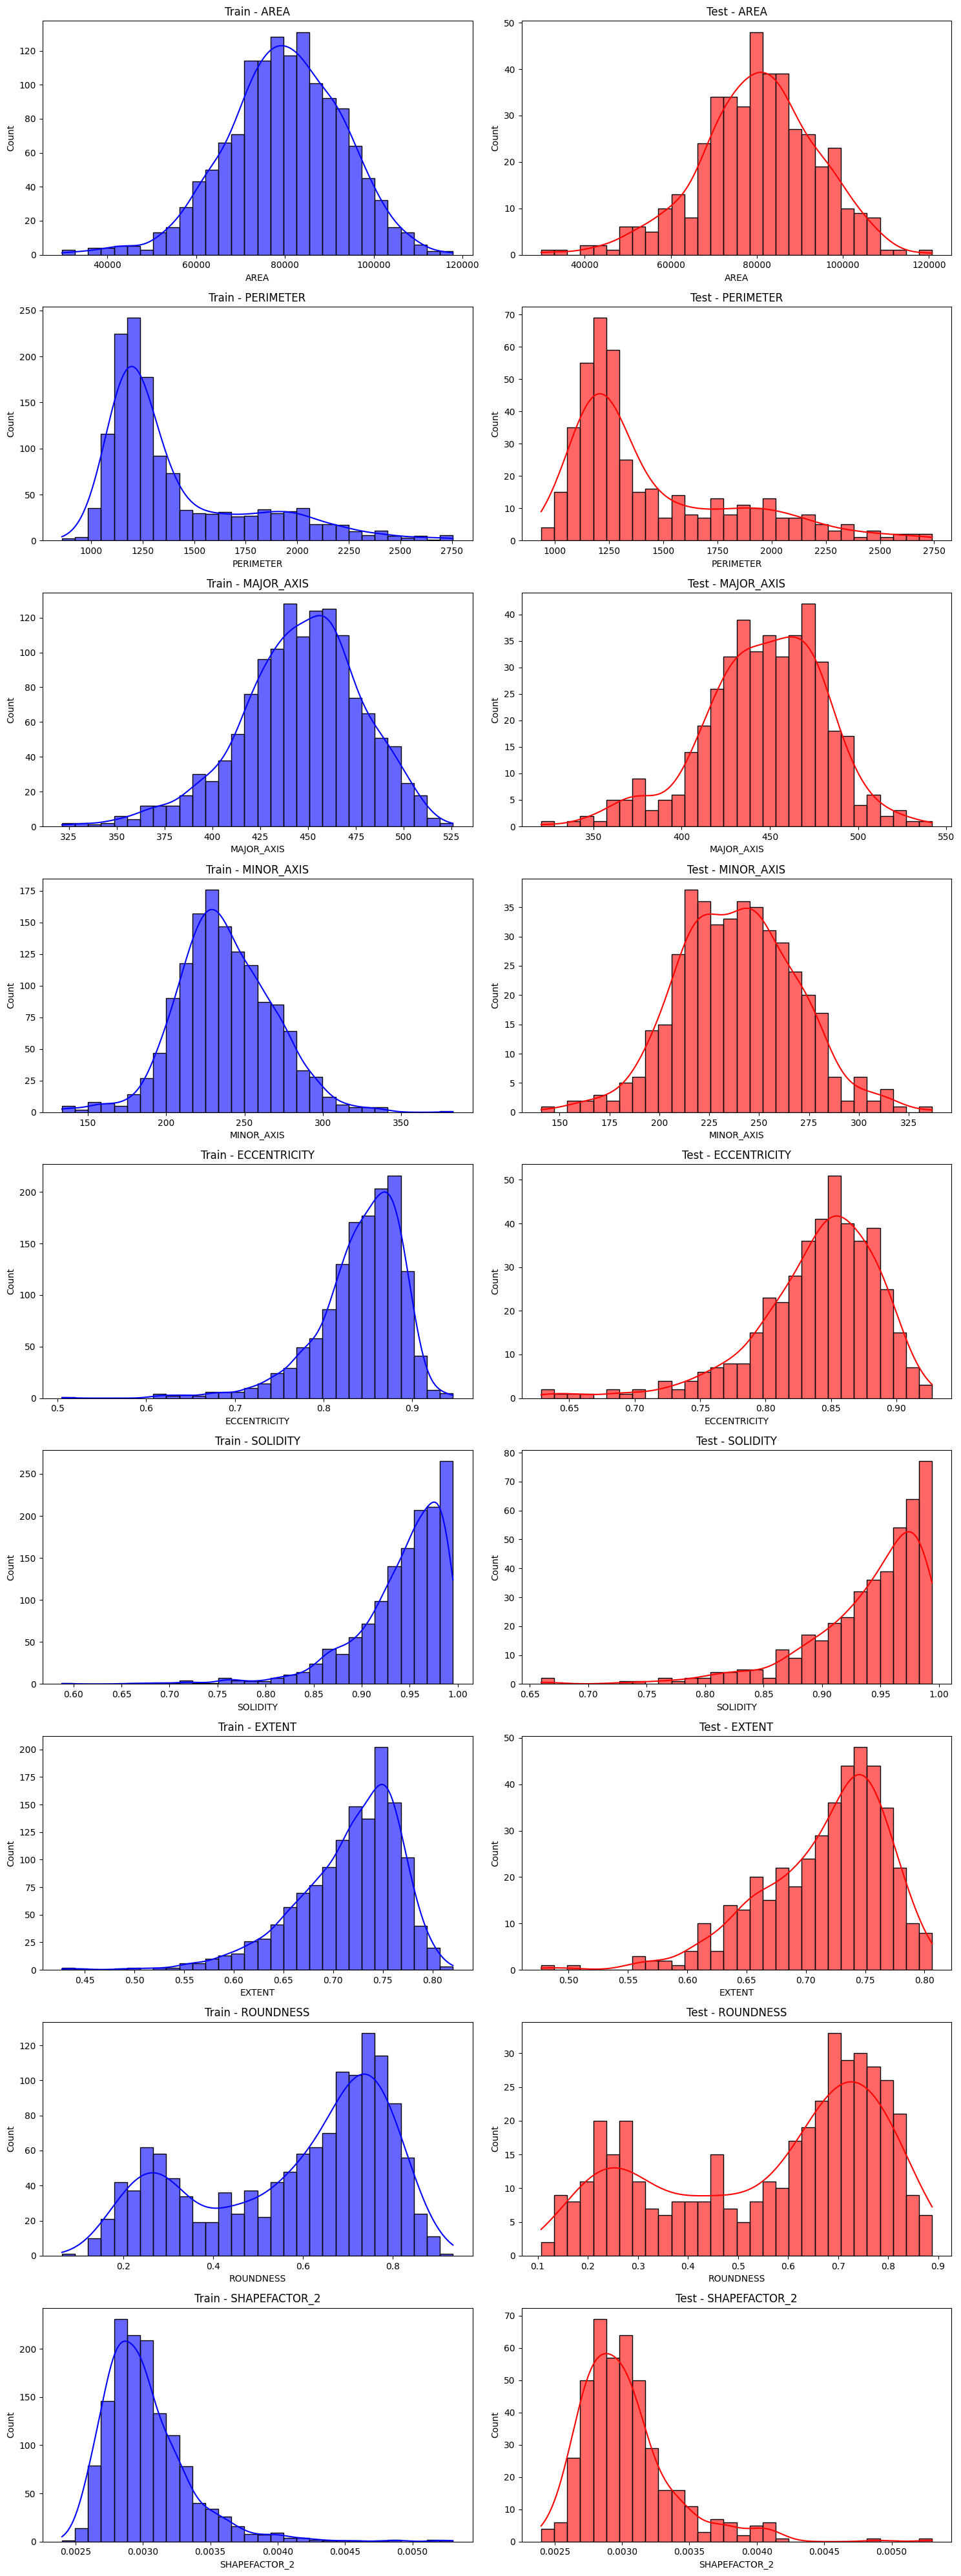

In [38]:
show(train_data, test_data, train_data.columns)

In [39]:
to_standardize = ['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS']
to_normalize = ['ECCENTRICITY','SOLIDITY', 'EXTENT', 'ROUNDNESS', 'SHAPEFACTOR_2']

In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
standarder = StandardScaler()
normalizer = MinMaxScaler()

train_data[to_standardize] = standarder.fit_transform(train_data[to_standardize])
test_data[to_standardize] = standarder.transform(test_data[to_standardize])
val_data[to_standardize] = standarder.transform(val_data[to_standardize])

train_data[to_normalize] = normalizer.fit_transform(train_data[to_normalize])
test_data[to_normalize] = normalizer.transform(test_data[to_normalize])
val_data[to_normalize] = normalizer.transform(val_data[to_normalize])

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل‌سازی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    حال که داده را پاکسازی کرده و احتمالا ویژگی‌هایی را به آن افزوده یا از آن حذف کرده‌اید، وقت آن است که مدلی آموزش دهید که بتواند متغیر هدف این مسئله را پیش‌بینی کند.
    الگوریتم <i>k-NN</i> نیز در کتابخانه‌ی <code>scikit-learn</code> به‌خوبی پیاده‌سازی شده و می‌توانیم از آن جهت اجرای الگوریتم <i>k-نزدیک‌ترین همسایه</i> بر روی مجموعه‌داده‌ی خود کمک بگیریم.
</font>
</p>

<h3 align=right style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    استفاده از <code>scikit-learn</code>
</font>
</h3>


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    الگوریتم <i>k-نزدیک‌ترین همسایه</i> با نام <code>KNeighborsClassifier</code> در پکیج <code>neighbors</code> این کتابخانه در دسترس است. برخی از آرگومان‌های مهم آن در جدول زیر آمده است، اما جهت مطالعه‌ی کامل‌تر مستندات می‌توانید به <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html" target="_blank">این لینک</a> مراجعه فرمایید.
</font>
</p>

<center>
<div dir=rtl style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|آرگومان|توضیحات|
|:------:|:---:|
|n_neighbors|تعداد همسایه‌ها (مقدار <code>k</code>)|
|p|مقدار توان در فاصله‌ی مینکوفسکی (اگر ۱ باشد معادل فاصله‌ی منهتن و اگر ۲ باشد معادل فاصله‌ی اقلیدسی خواهد بود)|
|weights|میزان تاثیر همسایگان را در پیش‌بینی نهایی مشخص می‌کند. اگر معادل <code>'uniform'</code> تنظیم شود آنگاه وزن تمام همسایگان با هم برابر است، اما اگر معادل <code>'distance'</code> تنظیم شود تاثیر همسایگان نزدیک‌تر بیشتر خواهد بود.|
    
</font>
</div>
</center>


<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
آموزش مدل
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در سلول زیر با استفاده از مدل آماده‌ای که در بالا شرح داده شد و به کمک تابع <code>fit</code> الگوریتم را بر روی مجموعه‌ی آموزشی اجرا کنید.
</font>
</p>

In [41]:
from sklearn.model_selection import cross_val_score, KFold

# Trying different values of k
k_values = range(1, 21)
cv_accuracies = []

X = train_data
y = train_target
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=kf)
    cv_accuracies.append(scores.mean())

# Find the best k
best_k = k_values[np.argmax(cv_accuracies)]
print(f'Best k: {best_k} with accuracy: {max(cv_accuracies):.4f}')

Best k: 14 with accuracy: 0.8661


In [42]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5, p=2, weights='distance') # To-Do
model.fit(train_data, train_target)

KNeighborsClassifier(weights='distance')

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معیار ارزیابی
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    معیاری که برای ارزیابی عملکرد مدل انتخاب کرده‌ایم، <code>F1-score</code> نام دارد.
    <br>
    این معیار، سنجه ارزیابی کیفیت مدل شماست. به عبارت بهتر در سامانه داوری هم از همین معیار برای نمره‌دهی استفاده شده است.
    <br>
    پیشنهاد می‌شود با توجه به این معیار، عملکرد مدل خود را بر روی مجموعه‌ی آموزش یا اعتبارسنجی ارزیابی کنید.
    <br>
    برای محاسبه‌ی عملکرد مدل طبق این معیار می‌توانید از <code>sklearn.metrics.f1_score</code> استفاده کرده و آرگومان میانگین‌گیری را معادل حالت وزن‌دار (<code dir=ltr>average='weighted'</code>) قرار دهید. جهت مطالعه‌ی مستندات این کلاس می‌توانید به <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html" target="_blank">این لینک</a> مراجعه فرمایید.
</font>
</p>

$$F_1=\frac{tp}{tp+\frac{1}{2}(fp+fn)}$$

In [43]:
# evaluate your model
from sklearn.metrics import f1_score

prediction_train = model.predict(train_data) # To-Do
prediction_val = model.predict(val_data) # To-Do

In [44]:
f1_score(train_target, prediction_train, average='weighted') # To-Do

1.0

In [45]:
f1_score(val_target, prediction_val, average='weighted') # To-Do

0.8519563272065251

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font color="red"><b color='red'>توجه:</b></font>
<font face="vazir" size=3>
 جهت کسب امتیاز کامل نیاز است تا پاسخ شما حداقل امتیاز <code>85</code> را با توجه به معیار معرفی‌شده کسب نماید.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
 پیش‌بینی برای داده تست و خروجی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    اکنون نیاز است به کمک مدل خود برای هرکدام از نمونه‌های موجود در مجموعه‌ی آزمون، پیش‌بینی کنید که به کدام دسته تعلق دارد.  نتایج را در یک دیتافریم به نام <code>prediction</code> مطابق جدول زیر آماده کنید.
</font>
</p>

<center>
<div dir=rtl style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|:------:|:---:|
|Class|نوع پسته‌ی پیش‌بینی‌شده|
    
</font>
</div>
</center>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    توجه داده باشید که نوع پسته را باید همچون مجموعه‌داده‌ی اولیه یعنی بصورت اسمی (<i>Kirmizi_Pistachio</i> یا <i>Siit_Pistachio</i>) درج کنید.
</font>
</p>

In [46]:
# predict test samples
prediction = model.predict(test_data) # To-Do


In [47]:
prediction= pd.DataFrame({'Class':prediction})

In [50]:
map_class_back = {0: 'Kirmizi_Pistachio', 1: 'Siit_Pistachio'}

In [51]:
prediction['Class'] = prediction['Class'].map(map_class_back)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [52]:
import zipfile
import joblib

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

joblib.dump(model, 'model')
prediction.to_csv('submission.csv', index=False)
file_names = ['pistachio.ipynb', 'submission.csv', 'model']
compress(file_names)

File Paths:
['pistachio.ipynb', 'submission.csv', 'model']


<h4 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>راهنمایی</b>
</font>
</h4>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    به نکات شرح داده شده در درسنامه نظیر تاثیر مقیاس ویژگی‌ها در عملکرد این الگوریتم و نحوه‌ی انتخاب مقدار مناسب برای <code>k</code> دقت فرمایید.
</font>
</p>